# Gather

In [37]:
import pandas as pd
import numpy as np
import tweepy
import json
import requests
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
data = pd.read_csv('Data/twitter-archive-enhanced.csv')

### Tweepy Section

In [32]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [33]:
# Create file tweet_json.txt and get tweet information using api.get_status and the tweet_id from the 
# csv file provided to us
with open('tweet_json.txt', 'w') as file:
    for tweet_id in data['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except tweepy.TweepError:
            print('Tweet not found: {}'.format(tweet_id))

Tweet not found: 888202515573088257
Tweet not found: 873697596434513921
Tweet not found: 872668790621863937
Tweet not found: 872261713294495745
Tweet not found: 869988702071779329
Tweet not found: 866816280283807744
Tweet not found: 861769973181624320
Tweet not found: 856602993587888130
Tweet not found: 851953902622658560
Tweet not found: 845459076796616705
Tweet not found: 844704788403113984
Tweet not found: 842892208864923648
Tweet not found: 837366284874571778
Tweet not found: 837012587749474308
Tweet not found: 829374341691346946
Tweet not found: 827228250799742977
Tweet not found: 812747805718642688
Tweet not found: 802247111496568832
Tweet not found: 779123168116150273
Tweet not found: 775096608509886464
Tweet not found: 771004394259247104
Tweet not found: 770743923962707968


Rate limit reached. Sleeping for: 68


Tweet not found: 759566828574212096
Tweet not found: 754011816964026368
Tweet not found: 680055455951884288


Rate limit reached. Sleeping for: 677


In [34]:
# Load tweet information and append it to a list
tweetsCollected = []
tweetsFile = open('tweet_json.txt', 'r')

for i in tweetsFile:
    try:
        tweet = json.loads(i)
        tweetsCollected.append(tweet)
    except:
        continue
        
tweetsFile.close()

In [35]:
#Create a function that retrieves tweetID, retweetCount, favouriteCount, and adds them to a dataframe.

def createDataframe(tweets):

    tweetDF = pd.DataFrame()

    tweetDF['tweetID'] = [tweet['id'] for tweet in tweets]
    
    tweetDF['retweetCount'] = [tweet['retweet_count'] for tweet 
    in tweets]
    
    tweetDF['favouriteCount'] = [tweet['favorite_count'] for tweet 
    in tweets]

    return tweetDF

tweetDF = createDataframe(tweetsCollected)

#Source: http://blog.impiyush.com/2015/03/data-analysis-using-twitter-api-and.html

In [38]:
tweetDF

,tweetID,retweetCount,favouriteCount
0,892420643555336193,7747,36435
1,892177421306343426,5739,31385
2,891815181378084864,3799,23648
3,891689557279858688,7911,39751
4,891327558926688256,8540,37958
...,...,...,...
2326,666049248165822465,41,98
2327,666044226329800704,133,274
2328,666033412701032449,41,113
2329,666029285002620928,42,121


### Requests section

In [39]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [42]:
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [45]:
imgData = pd.read_csv('image_predictions.tsv', sep='\t')

In [46]:
imgData

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


# Assess

- No duplicated data

##### Quality issues
- Remove in_reply_to_status/user_id column, as it is mostly empty and we do not want replies, only original tweets
- Remove retweeted columns as we only want original tweets
- Remove tweets that are not original
- Drop rows that do not have an 'expanded_urls' section
- Remove rows where rating_denominator is not 10
- Cases where rating_numerator is much greater, remove these. The admin for the twitter account has said themselves that they have not rated a dog 15/10, with 14/10 being the highest. This means the other ratings, eg 1776/10 rating are not to be taken seriously, and should be removed.
- Drop rating_denominator column once all values are 10, as this is no longer a column containing useful data
- Drop the same tweets in imgData and tweetDF that were dropped from data
- Remove HTML from data 'source' column

##### Tidyness issues
- Convert timestamp to datetime type and remove milliseconds
- Replace None with NaN in dog type rating floofer column
- Merge tweetDF into data, as we do not need a whole dataframe for 2 variables

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [73]:
data[data['in_reply_to_status_id'].isna() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [93]:
data[data['rating_numerator'] < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [96]:
data[data['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [99]:
data[data['expanded_urls'].isna() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [101]:
imgData.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [106]:
tweetDF.describe()

,tweetID,retweetCount,favouriteCount
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2721.444015,7612.670099
std,6.823170e+16,4603.271354,11811.534055
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,549.500000,1330.000000
50%,7.182469e+17,1277.000000,3314.000000
75%,7.986692e+17,3160.000000,9334.000000
max,8.924206e+17,78359.000000,157407.000000


In [128]:
# Images where neural network was not able to predict a dog breed once out of 3 guesses
imgData[(imgData['p1_dog'] == False) & (imgData['p2_dog'] == False) & (imgData['p3_dog'] == False)]['tweet_id']


6       666051853826850816
17      666104133288665088
18      666268910803644416
21      666293911632134144
25      666362758909284353
               ...        
2021    880935762899988482
2022    881268444196462592
2046    886680336477933568
2052    887517139158093824
2074    892420643555336193
Name: tweet_id, Length: 324, dtype: int64

In [134]:
data['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [135]:
data['name'].value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Cal          1
Molly        1
Gunner       1
Tupawc       1
Jarvis       1
Name: name, Length: 957, dtype: int64

In [137]:
data[data['puppo'] == 'puppo']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,None,None,None,puppo
71,878776093423087618,NaN,NaN,2017-06-25 00:45:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878776093...,13,10,Snoopy,None,None,None,puppo
94,874012996292530176,NaN,NaN,2017-06-11 21:18:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874012996...,13,10,Sebastian,None,None,None,puppo
129,867421006826221569,NaN,NaN,2017-05-24 16:44:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shikha. She just watched you drop a sk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867421006...,12,10,Shikha,None,None,None,puppo
168,859607811541651456,NaN,NaN,2017-05-03 03:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Sorry for the lack of posts today. I came home...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859607811...,13,10,None,None,None,None,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
395,825535076884762624,NaN,NaN,2017-01-29 02:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very loving and accepting puppo. Appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825535076...,14,10,None,None,None,None,puppo
397,825120256414846976,NaN,NaN,2017-01-27 23:16:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Pablo. He's one go...,8.250266e+17,4.196984e+09,2017-01-27 17:04:02 +0000,https://www.gofundme.com/my-puppys-double-cata...,12,10,Pablo,None,None,None,puppo
398,825026590719483904,NaN,NaN,2017-01-27 17:04:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Pablo. He's one gorgeous puppo. A...,NaN,NaN,NaN,https://www.gofundme.com/my-puppys-double-cata...,12,10,Pablo,None,None,None,puppo


In [138]:
data.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

# Cleaning

- No duplicated data

##### Quality issues
- Remove in_reply_to_status/user_id column, as it is mostly empty and we do not want replies, only original tweets
- Remove retweeted columns as we only want original tweets
- Remove tweets that are not original
- Drop rows that do not have an 'expanded_urls' section
- Remove rows where rating_denominator is not 10
- Cases where rating_numerator is much greater, remove these. The admin for the twitter account has said themselves that they have not rated a dog 15/10, with 14/10 being the highest. This means the other ratings, eg 1776/10 rating are not to be taken seriously, and should be removed.
- Drop rating_denominator column once all values are 10, as this is no longer a column containing useful data
- Drop the same tweets in imgData and tweetDF that were dropped from data
- Remove HTML from data 'source' column

##### Tidyness issues
- Convert timestamp to datetime type and remove milliseconds
- Replace None with NaN in dog type rating floofer column
- Merge tweetDF into data, as we do not need a whole dataframe for 2 variables

In [409]:
# Create copies of dataframes to avoid messing up the original dataframes
dataCopy = data.copy()
tweetDFCopy = tweetDF.copy()
imgDataCopy = imgData.copy()

In [411]:
# Test
dataCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [412]:
# Remove tweets that are not original, ie. replies and retweets
dataCopy.drop(dataCopy[dataCopy['in_reply_to_status_id'].isna() == False].index, inplace=True)
dataCopy.drop(dataCopy[dataCopy['retweeted_status_id'].isna() == False].index, inplace=True)

In [413]:
# Test
dataCopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [414]:
# Remove in_reply_to_status/user_id column, as it is mostly empty and we do not want replies, only original tweets
# Remove retweeted columns as we only want original tweets
dataCopy.drop('in_reply_to_status_id', axis=1, inplace=True)
dataCopy.drop('in_reply_to_user_id', axis=1, inplace=True)
dataCopy.drop('retweeted_status_id', axis=1, inplace=True)
dataCopy.drop('retweeted_status_user_id', axis=1, inplace=True)
dataCopy.drop('retweeted_status_timestamp', axis=1, inplace=True)

In [468]:
# Test
dataCopy.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo,retweetCount,favouriteCount
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,None,7747.0,36435.0


In [419]:
# Drop rows that do not have an 'expanded_urls' section
dataCopy.drop(dataCopy[dataCopy['expanded_urls'].isna() == True].index, inplace=True)

In [420]:
# Test
# Check to see rows were removed
dataCopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2094 non-null   int64 
 1   timestamp           2094 non-null   object
 2   source              2094 non-null   object
 3   text                2094 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2094 non-null   int64 
 6   rating_denominator  2094 non-null   int64 
 7   name                2094 non-null   object
 8   doggo               2094 non-null   object
 9   floofer             2094 non-null   object
 10  pupper              2094 non-null   object
 11  puppo               2094 non-null   object
dtypes: int64(3), object(9)
memory usage: 212.7+ KB


In [421]:
# Remove rows where rating_denominator is not 10
dataCopy.drop(dataCopy[dataCopy['rating_denominator'] != 10].index, inplace=True)

In [426]:
# Test
# Check rows successfully dropped
dataCopy[dataCopy['rating_denominator'] != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [427]:
# Drop rating_denominator column once all values are 10, as this is no longer a column containing useful data
dataCopy.drop('rating_denominator', axis=1, inplace=True)

In [428]:
# Test
dataCopy.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,None


In [429]:
# Cases where rating_numerator is much greater, remove these. 
# The admin for the twitter account has said themselves that they have not rated a dog 15/10,
# with 14/10 being the highest. This means the other ratings, eg 1776/10 rating are not to be taken seriously,
# and should be removed.
dropNumerator = [75, 420, 26, 27, 1776]

for num in dropNumerator:
    dataCopy.drop(dataCopy[dataCopy['rating_numerator'] == num].index, inplace=True)

In [432]:
# Test
dataCopy['rating_numerator'].value_counts()

12    485
10    434
11    413
13    287
9     152
8      98
7      51
14     38
5      34
6      32
3      19
4      15
2       9
1       4
0       1
Name: rating_numerator, dtype: int64

In [433]:
# Rename tweetDF column name to make merging of dataframes easier
tweetDFCopy.rename(columns={"tweetID": "tweet_id"}, inplace=True)

In [434]:
# Test
tweetDFCopy.head()

,tweet_id,retweetCount,favouriteCount
0,892420643555336193,7747,36435
1,892177421306343426,5739,31385
2,891815181378084864,3799,23648
3,891689557279858688,7911,39751
4,891327558926688256,8540,37958


In [435]:
# Merge tweetDF into data, as we do not need a whole dataframe for 2 variables
dataCopy = pd.merge(dataCopy, tweetDFCopy, how='left', on='tweet_id')

In [439]:
# Test
dataCopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2071
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          2072 non-null   int64  
 1   timestamp         2072 non-null   object 
 2   source            2072 non-null   object 
 3   text              2072 non-null   object 
 4   expanded_urls     2072 non-null   object 
 5   rating_numerator  2072 non-null   int64  
 6   name              2072 non-null   object 
 7   doggo             2072 non-null   object 
 8   floofer           2072 non-null   object 
 9   pupper            2072 non-null   object 
 10  puppo             2072 non-null   object 
 11  retweetCount      2065 non-null   float64
 12  favouriteCount    2065 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 226.6+ KB


In [440]:
# Drop rows where retweet and favourite count not found
dataCopy.drop(dataCopy[dataCopy['retweetCount'].isna() == True].index, inplace=True)

In [441]:
# Test
dataCopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2065 entries, 0 to 2071
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          2065 non-null   int64  
 1   timestamp         2065 non-null   object 
 2   source            2065 non-null   object 
 3   text              2065 non-null   object 
 4   expanded_urls     2065 non-null   object 
 5   rating_numerator  2065 non-null   int64  
 6   name              2065 non-null   object 
 7   doggo             2065 non-null   object 
 8   floofer           2065 non-null   object 
 9   pupper            2065 non-null   object 
 10  puppo             2065 non-null   object 
 11  retweetCount      2065 non-null   float64
 12  favouriteCount    2065 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 225.9+ KB


In [442]:
# Create test dataframe which removes all tweet_id's except the ones still in dataCopy
imgDataTest = pd.merge(dataCopy, imgDataCopy, how='left', on='tweet_id')

In [444]:
# Test
imgDataTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2065 entries, 0 to 2064
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          2065 non-null   int64  
 1   timestamp         2065 non-null   object 
 2   source            2065 non-null   object 
 3   text              2065 non-null   object 
 4   expanded_urls     2065 non-null   object 
 5   rating_numerator  2065 non-null   int64  
 6   name              2065 non-null   object 
 7   doggo             2065 non-null   object 
 8   floofer           2065 non-null   object 
 9   pupper            2065 non-null   object 
 10  puppo             2065 non-null   object 
 11  retweetCount      2065 non-null   float64
 12  favouriteCount    2065 non-null   float64
 13  jpg_url           1942 non-null   object 
 14  img_num           1942 non-null   float64
 15  p1                1942 non-null   object 
 16  p1_conf           1942 non-null   float64


In [445]:
# Create new dataframe that has same name as original copy dataframe. Essentially creating the same dataframe,
# just without the tweet_id's that are not in the other dataframes.
imgDataCopy = imgDataTest.copy()

In [446]:
# Drop columns not in original dataframe of imgData
imgDataCopy.drop(imgDataCopy.loc[:, 'timestamp':'favouriteCount'].columns, axis=1, inplace=True) 

In [448]:
# Test
imgDataCopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2065 entries, 0 to 2064
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2065 non-null   int64  
 1   jpg_url   1942 non-null   object 
 2   img_num   1942 non-null   float64
 3   p1        1942 non-null   object 
 4   p1_conf   1942 non-null   float64
 5   p1_dog    1942 non-null   object 
 6   p2        1942 non-null   object 
 7   p2_conf   1942 non-null   float64
 8   p2_dog    1942 non-null   object 
 9   p3        1942 non-null   object 
 10  p3_conf   1942 non-null   float64
 11  p3_dog    1942 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 209.7+ KB


In [451]:
# Remove rows where tweet_id has not been predicted
imgDataCopy.drop(imgDataCopy[imgDataCopy['jpg_url'].isna() == True].index, inplace=True)

In [453]:
# Test
# Check tweet_id's successfully removed
imgDataCopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1942 entries, 0 to 2064
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1942 non-null   int64  
 1   jpg_url   1942 non-null   object 
 2   img_num   1942 non-null   float64
 3   p1        1942 non-null   object 
 4   p1_conf   1942 non-null   float64
 5   p1_dog    1942 non-null   object 
 6   p2        1942 non-null   object 
 7   p2_conf   1942 non-null   float64
 8   p2_dog    1942 non-null   object 
 9   p3        1942 non-null   object 
 10  p3_conf   1942 non-null   float64
 11  p3_dog    1942 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 197.2+ KB


In [454]:
# Remove HTML from data 'source' column
dataCopy['source'] = dataCopy['source'].str.replace('<[^<]+?>', '')
#Source: https://stackoverflow.com/questions/45999415/removing-html-tags-in-pandas#comment89865881_45999467

In [455]:
# Test
dataCopy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo,retweetCount,favouriteCount
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,None,7747.0,36435.0
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,None,None,None,5739.0,31385.0
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,None,None,None,3799.0,23648.0
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,None,None,None,7911.0,39751.0
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,None,None,None,8540.0,37958.0


In [456]:
# Convert timestamp to datetime type and remove milliseconds
dataCopy['timestamp'] = dataCopy['timestamp'].str[:-6]
dataCopy['timestamp'] = pd.to_datetime(dataCopy['timestamp'])

In [458]:
# Test
dataCopy.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo,retweetCount,favouriteCount
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,None,7747.0,36435.0


In [459]:
# Replace None with NaN in dog type rating floofer column
dataCopyTest['doggo'].replace('None', np.NaN, inplace=True)
dataCopyTest['floofer'].replace('None', np.NaN, inplace=True)
dataCopyTest['pupper'].replace('None', np.NaN, inplace=True)
dataCopyTest['puppo'].replace('None', np.NaN, inplace=True)

Test

Check columns still include dog types, and not all just set to NaN

In [466]:
dataCopyTest['doggo'].unique()

array([nan, 'doggo'], dtype=object)

In [463]:
dataCopyTest['floofer'].unique()

array([nan, 'floofer'], dtype=object)

In [464]:
dataCopyTest['pupper'].unique()

array([nan, 'pupper'], dtype=object)

In [465]:
dataCopyTest['puppo'].unique()

array([nan, 'puppo'], dtype=object)

# Final datasets

In [469]:
dataCopy

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo,retweetCount,favouriteCount
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,None,7747.0,36435.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,None,None,None,5739.0,31385.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,None,None,None,3799.0,23648.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,None,None,None,7911.0,39751.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,None,None,None,8540.0,37958.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,666049248165822465,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,None,None,None,None,None,41.0,98.0
2068,666044226329800704,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,a,None,None,None,None,133.0,274.0
2069,666033412701032449,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,a,None,None,None,None,41.0,113.0
2070,666029285002620928,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,a,None,None,None,None,42.0,121.0


In [470]:
imgDataCopy

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2060,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2061,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2062,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2063,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [479]:
dataCopy.to_csv('Data/twitter_archive_master.csv', sep=',')

In [476]:
imgDataCopy.to_csv('Data/FinalImgData.csv', sep=',')

# Analysis

In [480]:
twitterAnalysis = pd.read_csv('Data/twitter_archive_master.csv', index_col=0)

In [481]:
twitterAnalysis.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo,retweetCount,favouriteCount
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,None,7747.0,36435.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,None,None,None,5739.0,31385.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,None,None,None,3799.0,23648.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,None,None,None,7911.0,39751.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,None,None,None,8540.0,37958.0


In [532]:
(twitterAnalysis[twitterAnalysis['rating_numerator'] == 14].shape[0]
 /twitterAnalysis.shape[0])*100

1.8401937046004841

In [485]:
twitterAnalysis['rating_numerator'].value_counts()

12    483
10    433
11    413
13    283
9     152
8      98
7      51
14     38
5      34
6      32
3      19
4      15
2       9
1       4
0       1
Name: rating_numerator, dtype: int64

In [527]:
twitterAnalysis['rating_numerator'].mean()

10.60048426150121

In [489]:
twitterAnalysis['name'].value_counts()[:20]

None       587
a           54
Oliver      10
Lucy        10
Cooper      10
Charlie     10
Penny        9
Tucker       9
Lola         8
Winston      8
the          8
Sadie        8
Daisy        7
Toby         7
Koda         6
Oscar        6
Jax          6
Stanley      6
Bo           6
Bailey       6
Name: name, dtype: int64

In [492]:
# Format for finding name: 'This is...', 'Meet ...'
twitterAnalysis[twitterAnalysis['name'] == 'Bo']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo,retweetCount,favouriteCount
348,819004803107983360,2017-01-11 02:15:36,Twitter for iPhone,This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14,Bo,doggo,None,None,None,37684.0,88711.0
429,804026241225523202,2016-11-30 18:16:08,Twitter for iPhone,This is Bo. He's going to make me cry. 13/10 p...,https://twitter.com/dog_rates/status/804026241...,13,Bo,None,None,None,None,16645.0,45753.0
513,789137962068021249,2016-10-20 16:15:26,Twitter for iPhone,This is Bo. He's a West Congolese Bugaboop Snu...,https://twitter.com/dog_rates/status/789137962...,12,Bo,None,None,None,None,2884.0,9989.0
671,761004547850530816,2016-08-04 01:03:17,Twitter for iPhone,This is Bo and Ty. Bo eats paper and Ty felt l...,https://twitter.com/dog_rates/status/761004547...,11,Bo,None,None,None,None,3525.0,11490.0
762,749996283729883136,2016-07-04 16:00:22,TweetDeck,This is Bo. He emanates happiness. 12/10 I cou...,https://twitter.com/dog_rates/status/749996283...,12,Bo,None,None,None,None,824.0,3097.0
1426,681694085539872773,2015-12-29 04:31:49,Twitter for iPhone,This is Bo. He's a Benedoop Cumbersnatch. Seem...,https://twitter.com/dog_rates/status/681694085...,11,Bo,None,None,pupper,None,4065.0,12837.0


In [494]:
twitterAnalysis['doggo'].value_counts()

None     1983
doggo      82
Name: doggo, dtype: int64

In [495]:
twitterAnalysis['floofer'].value_counts()

None       2055
floofer      10
Name: floofer, dtype: int64

In [496]:
twitterAnalysis['pupper'].value_counts()

None      1837
pupper     228
Name: pupper, dtype: int64

In [497]:
twitterAnalysis['puppo'].value_counts()

None     2041
puppo      24
Name: puppo, dtype: int64

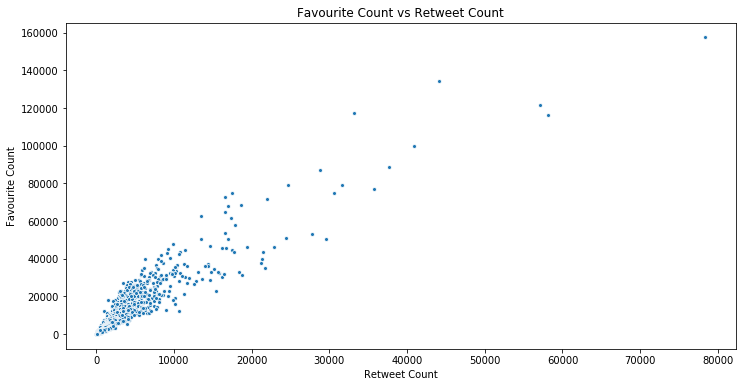

In [525]:
import seaborn as sns
plot = sns.scatterplot(x=twitterAnalysis['retweetCount'], y=twitterAnalysis['favouriteCount'],
            s=15, x_jitter=True, y_jitter=True)

plot.figure.set_figwidth(12)
plot.figure.set_figheight(6)
plot.set_title('Favourite Count vs Retweet Count')
plot.set_xlabel('Retweet Count')
plot.set_ylabel('Favourite Count');

In [535]:
twitterAnalysis.corr()['retweetCount']['favouriteCount']

0.9262776964099702